In [81]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import itertools
%matplotlib inline
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
import vk

In [193]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

Получим токен для парсинга vk (http://all-for-vkontakte.ru/catalog/access-token-vkontakte)

In [56]:
with open('/Users/anton.andreytsev/private_vk_token.txt', mode='r') as f:
    token = f.readlines()[0].strip()
user_id = '10779989'

In [82]:
session = vk.Session(access_token=token)
vk_api = vk.API(session)

Описание методов vk: https://vk.com/dev/wall.getById

In [109]:
my_information = vk_api.users.get(user_id=user_id, v='5.0', fields='photo_id, verified, sex, bdate, city, country, home_town, has_photo, photo_50, photo_100, photo_200_orig, photo_200, photo_400_orig, photo_max, photo_max_orig, online, domain, has_mobile, contacts, site, education, universities, schools, status, last_seen, followers_count, common_count, occupation, nickname, relatives, relation, personal, connections, exports, activities, interests, music, movies, tv, books, games, about, quotes, can_post, can_see_all_posts, can_see_audio, can_write_private_message, can_send_friend_request, is_favorite, is_hidden_from_feed, timezone, screen_name, maiden_name, crop_photo, is_friend, friend_status, career, military, blacklisted, blacklisted_by_me, can_be_invited_group')
my_information

[{'id': 10779989,
  'first_name': 'Антон',
  'last_name': 'Андрейцев',
  'sex': 2,
  'nickname': '',
  'domain': 'andreytsev',
  'screen_name': 'andreytsev',
  'bdate': '14.10.1994',
  'city': 1,
  'country': 1,
  'timezone': 3,
  'photo_50': 'https://pp.userapi.com/c639725/v639725782/4b789/yZodBGIqUNQ.jpg?ava=1',
  'photo_100': 'https://pp.userapi.com/c639725/v639725782/4b788/YzvB8SFuzPc.jpg?ava=1',
  'photo_200': 'https://pp.userapi.com/c639725/v639725782/4b786/8h8LjTvJkC0.jpg?ava=1',
  'photo_max': 'https://pp.userapi.com/c639725/v639725782/4b786/8h8LjTvJkC0.jpg?ava=1',
  'photo_200_orig': 'https://pp.userapi.com/c639725/v639725782/4b786/8h8LjTvJkC0.jpg?ava=1',
  'photo_400_orig': 'https://pp.userapi.com/c639725/v639725782/4b787/DttvyOZhp7w.jpg?ava=1',
  'photo_max_orig': 'https://pp.userapi.com/c639725/v639725782/4b787/DttvyOZhp7w.jpg?ava=1',
  'photo_id': '10779989_456239921',
  'has_photo': 1,
  'has_mobile': 1,
  'is_friend': 0,
  'friend_status': 0,
  'online': 1,
  'can_post':

In [112]:
my_groups = vk_api.users.getSubscriptions(user_id=user_id, v='5.0', extended=True)
my_groups

{'count': 235,
 'items': [{'id': 40485321,
   'name': 'ART LEGALE',
   'screen_name': 'art_legale',
   'is_closed': 0,
   'type': 'page',
   'is_admin': 0,
   'is_member': 1,
   'is_advertiser': 0,
   'photo_50': 'https://sun1-17.userapi.com/c840631/v840631870/1dbb4/fdMxVm1bk7o.jpg?ava=1',
   'photo_100': 'https://sun1-16.userapi.com/c840631/v840631870/1dbb3/UgmTK8CcPRs.jpg?ava=1',
   'photo_200': 'https://sun1-14.userapi.com/c840631/v840631870/1dbb2/BAjHKg3ITPA.jpg?ava=1'},
  {'id': 28091848,
   'name': 'Я ♡ САМБО | Я люблю борьбу',
   'screen_name': 'love_sambo',
   'is_closed': 0,
   'type': 'page',
   'is_admin': 0,
   'is_member': 1,
   'is_advertiser': 0,
   'photo_50': 'https://sun1-83.userapi.com/c824411/v824411545/126396/TWkraZeSnNg.jpg?ava=1',
   'photo_100': 'https://sun1-18.userapi.com/c824411/v824411545/126395/KF-BVulegAM.jpg?ava=1',
   'photo_200': 'https://sun1-15.userapi.com/c824411/v824411545/126393/QjWo6equNvg.jpg?ava=1'},
  {'id': 42072344,
   'name': 'The Brain | бл

In [124]:
%%time
my_friends = vk_api.friends.get(user_id=user_id, v='5.0', order='name', count=None, offset=5, fields='nickname, domain, sex, bdate, city, country, timezone, photo_50, photo_100, photo_200_orig, has_mobile, contacts, education, online, relation, last_seen, status, can_write_private_message, can_see_all_posts, can_post, universities', name_case='ins')
my_friends['items'][:15]

Wall time: 1.53 s


[{'id': 7088779,
  'first_name': 'Alena',
  'last_name': 'Logvinova',
  'sex': 1,
  'nickname': '@ 7088779 @',
  'domain': 'id7088779',
  'bdate': '19.9',
  'city': 1,
  'country': 1,
  'photo_50': 'https://pp.userapi.com/c840426/v840426587/b953/epT_mspnBJg.jpg?ava=1',
  'photo_100': 'https://pp.userapi.com/c840426/v840426587/b952/_HxahpO3yZo.jpg?ava=1',
  'photo_200_orig': 'https://pp.userapi.com/c840426/v840426587/b950/TPz2Vi_2fj4.jpg?ava=1',
  'has_mobile': 1,
  'online': 0,
  'can_post': 1,
  'can_see_all_posts': 1,
  'can_write_private_message': 1,
  'mobile_phone': 'Iphone 4S',
  'home_phone': 'Panasonic',
  'status': '',
  'last_seen': {'time': 1563258822, 'platform': 2},
  'university': 2,
  'university_name': 'МГУ',
  'faculty': 43,
  'faculty_name': 'Экономический факультет',
  'graduation': 2016,
  'education_form': 'Очное отделение',
  'education_status': 'Студентка (бакалавр)',
  'relation': 0,
  'universities': [{'id': 2,
    'country': 1,
    'city': 1,
    'name': 'МГУ'

Получение списка общих друзей

In [144]:
mutual_friends_ids = vk_api.friends.getMutual(source_uid='25190611', target_uid='7088779', v='5.0')
mutual_friends_ids[:15]

[8493608, 10779989, 174313329]

Составим граф связей между моими друзьями

In [317]:
my_id = 10779989
my_friends_ids = [int(friend['id']) for friend in my_friends['items'] if 'deactivated' not in friend]
id_position_dict = dict(zip(my_friends_ids, range(len(my_friends_ids))))
# Создаём пустую матрицу
adjucency_dict = {}
deleted_users = []
# Пробегаем по всем моим друзьям
for n, userid in tqdm_notebook(enumerate(id_position_dict.keys())):
    # Находим всех друзей моего i-ого друга
    time.sleep(0.2)
    current_users_friends = vk_api.friends.get(user_id=userid, v='5.0', order='name', offset=5, name_case='ins')['items']
    # Убираем из них меня
    current_users_friends = [id_ for id_ in current_users_friends if id_ != my_id]
    # Пересекаем друзей моего друга с моими друзьями
    current_users_friends_intersection = list(set(current_users_friends).intersection(set(id_position_dict.keys())))
    adjucency_dict.update({userid: current_users_friends_intersection})

        
adjucency_matrix = np.zeros((len(adjucency_dict), len(adjucency_dict)))
actual_ids = list(adjucency_dict.keys())
adjucency_matrix_id_positions_dict = dict(zip(actual_ids, range(len(actual_ids))))
adjucency_matrix_positions_id_dict = {x: y for y, x in adjucency_matrix_id_positions_dict.items()}
for key in tqdm_notebook(adjucency_matrix_id_positions_dict):
    columns = np.array([adjucency_matrix_id_positions_dict[id_] for id_ in adjucency_dict[key]])
    if len(columns) > 0:
        adjucency_matrix[adjucency_matrix_id_positions_dict[key], columns] = 1

for i in range(adjucency_matrix.shape[0]):
    for j in range(adjucency_matrix.shape[1]):
        if adjucency_matrix[i, j] == 1 or adjucency_matrix[j, i] == 1:
            adjucency_matrix[i, j] = 1
            adjucency_matrix[j, i] = 1

In [412]:
import networkx as nx

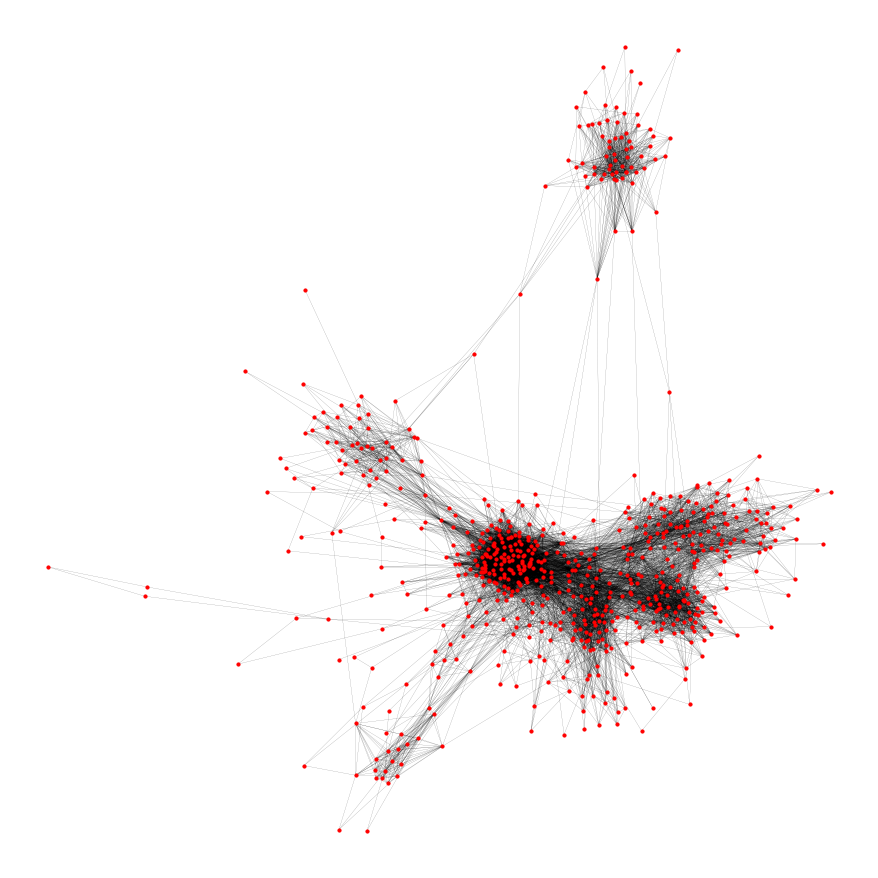

In [452]:
plt.figure(figsize=(12, 12))
G = nx.Graph(adjucency_matrix[adjucency_matrix.sum(axis=1) > 1][:, adjucency_matrix.sum(axis=1) > 1]) # убираем односвязные компоненты
nx.draw(G, nodecolor='red', edge_color='black', node_size=10, with_labels=False, width=0.1)